## Stability plots in the habit persistence model

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from habit_model import AbelModel
from matplotlib import cm

In [3]:

def compute_fig_matrices(m, beta_vals, sigma_vals):
    R_calin = np.empty((m, m))
    R_sr = np.empty((m, m))

    for i, β in enumerate(beta_vals):
        for j, σ in enumerate(sigma_vals):
            ab = AbelModel(β=β, σ=σ)
            R_calin[i, j] = ab.calin_test()
            R_sr[i, j] = ab.exponent_analytic()
            
    return R_calin, R_sr

In [4]:
m = 20
beta_vals = np.linspace(0.4, 0.99, m)
sigma_vals = np.linspace(0.001, 0.6, m)
    
R_calin, R_sr = compute_fig_matrices(m, beta_vals, sigma_vals)

Now plot:

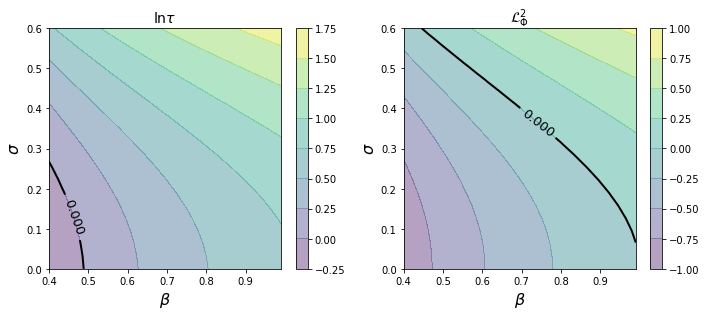

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4.5))

ax = axes[0]

cs1 = ax.contourf(beta_vals, 
            sigma_vals, 
            R_calin.T,
            alpha=0.4)

ctr1 = ax.contour(beta_vals, sigma_vals, R_calin.T, levels=[0.0], colors='k', linewidths=2)
plt.clabel(ctr1, inline=1, fontsize=13)
plt.colorbar(cs1, ax=ax)

ax.set_title(r'$\ln \tau$', fontsize=14)
ax.set_xlabel(r'$\beta$', fontsize=16)
ax.set_ylabel(r'$\sigma$', fontsize=16)


ax = axes[1]

cs2 = ax.contourf(beta_vals, 
            sigma_vals, 
            R_sr.T,
            alpha=0.4)

ctr2 = ax.contour(beta_vals, sigma_vals, R_sr.T, levels=[0.0], colors='k', linewidths=2)
plt.clabel(ctr2, inline=1, fontsize=13)
plt.colorbar(cs2)

ax.set_title(r'$\mathcal{L}_\Phi^2$', fontsize=14)
ax.set_xlabel(r'$\beta$', fontsize=16)
ax.set_ylabel(r'$\sigma$', fontsize=16)

    
plt.tight_layout()
plt.savefig("abel1.pdf")
plt.show()